# Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

The main objective: to deploy a suitable machine learning model to the data set.
<br>
<br>
<br>
The following steps are taken:
 - loading and basic inspecting the dataset
 - data set cleaning and creating additional features
 - identifying factors that influence house prices
 - finding a correlation between the feature to predict and other features
 - correlation plotting
 - feature scaling
 - analysis machine learning results
 - enhancing the chosen machine learning model
 - identifying what features after deploying the machine learning model affect the feature to predict the most 

## 1. Data Import and First Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df.total_rooms.value_counts()

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
          ..
7784.0     1
7916.0     1
6859.0     1
6846.0     1
5639.0     1
Name: total_rooms, Length: 5926, dtype: int64

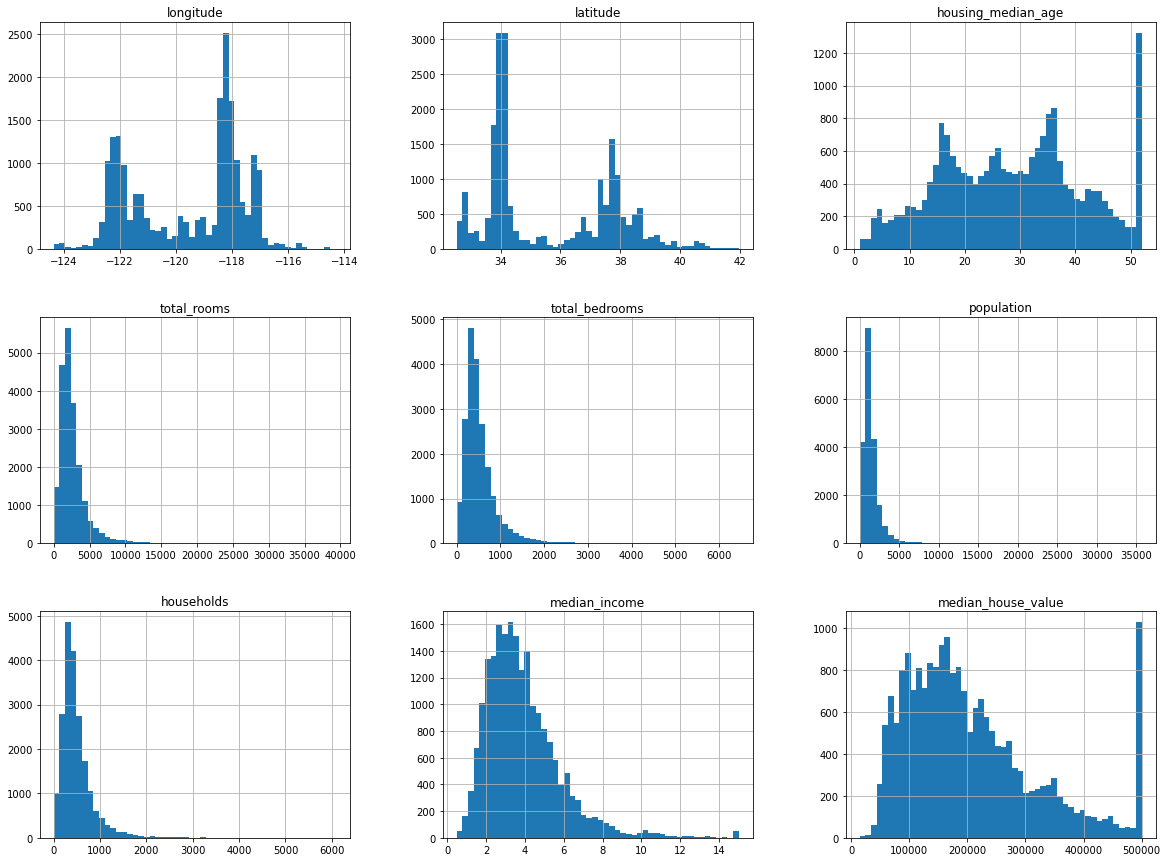

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Data Cleaning and Creating Additional Features

Objectives:
- droping all rows with (at least one) missing value(s)
- adding some additional features to the ds

In [12]:
# dropping all rows with (at least one) missing value(s)
df.dropna(inplace=True)

In [13]:
# additional feature "rooms_per_household"
df["rooms_per_household"] = df.total_rooms.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [14]:
# additional feature "population_per_household"
df["population_per_household"] = df.population.div(df.households)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209


In [15]:
# additional feature "bedrooms_per_room"
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## 3. Factors that Influence House Prices

Objectives:
- finding the correlation between features to predict and all other feature
- correlation plotting 

__Calculating the correlation between "median_house_value" and all features__

In [17]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.002304,0.092657
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.002522,-0.113815
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,0.013258,0.136089
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,-0.024596,-0.187900
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355,0.084238
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,0.070062,0.035319
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.027336,0.065087
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,0.018894,-0.615661
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.023639,-0.255880
rooms_per_household,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,-0.004873,-0.416952


In [18]:
df.corr().median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [19]:
# it seems like there is only one feature that could be somehow considered correlative to median_house_value
# and it is the median_income feature. also we cannot find any strong anticorrelated feature.  

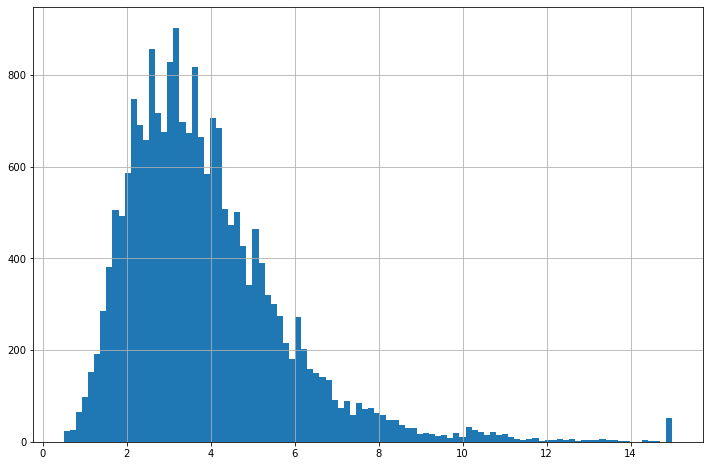

In [20]:
# plotting median_income feature
df.median_income.hist(bins = 100, figsize = (12, 8))
plt.show()

# editted: noted that the feature is scaled 

__Plotting correlations with .jointplot__

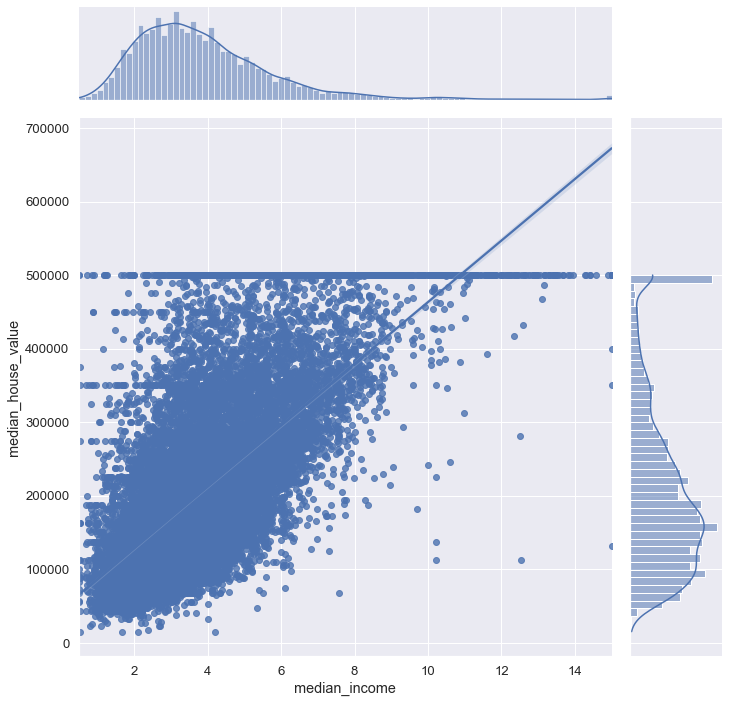

In [21]:
# ploting a linear correlation with .jointplot
sns.set(font_scale=1.2)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", height = 10)
plt.show()

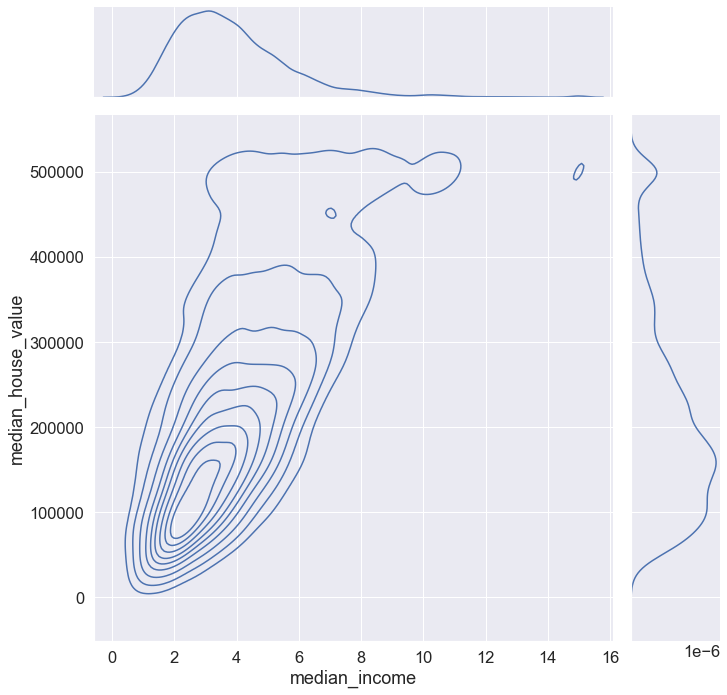

In [22]:
# as expected, we can see that usually the higher the income is,  the higher the house prices are

# ploting a linear kernel density estimate with .jointplot
# for finding the most common x-y combination
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", height = 10)
plt.show()

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

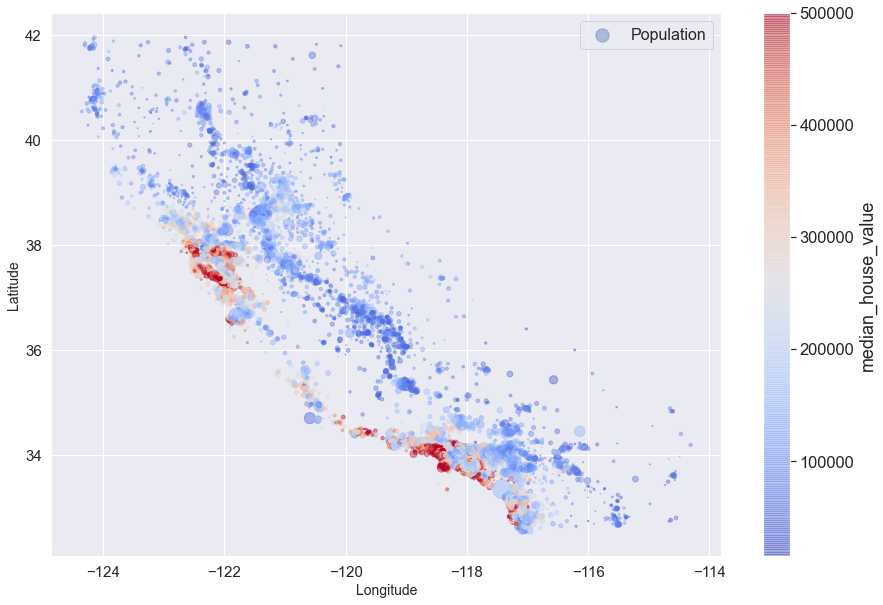

In [23]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()
# expected output: a coolwarm map of the state of California with the population data density 

In [24]:
# the most expensive houses are clustered in San Francisco, Los Angeles and San Diego 

In [25]:
# definitely, there is no linear relation between house prices and longitude or latitude.
# we will try to make a prediction with the Random Forest modeling

## 4. Advanced Explanatory Data Analysis with Seaborn

Objectives:
- dividing income data points according to quantiles
- plotting the relation of income categories with other features

__Adding the additional column "income_cat"__ 
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [26]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [27]:
df.income_cat

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very High']

In [28]:
# getting normalized the income_cat column 
df.income_cat.value_counts(normalize = True)

Above_Average    0.250037
Low              0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

__Plotting the relation of income categories with other features__

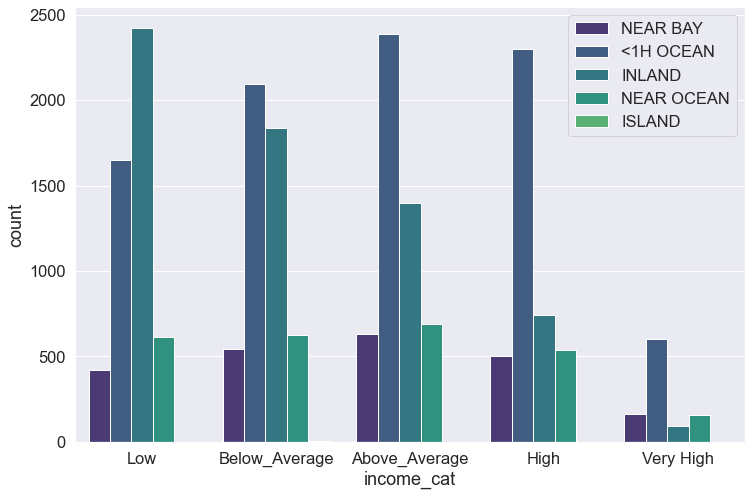

In [29]:
# income_cat column to ocean_proximity column plot with .countplot
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)

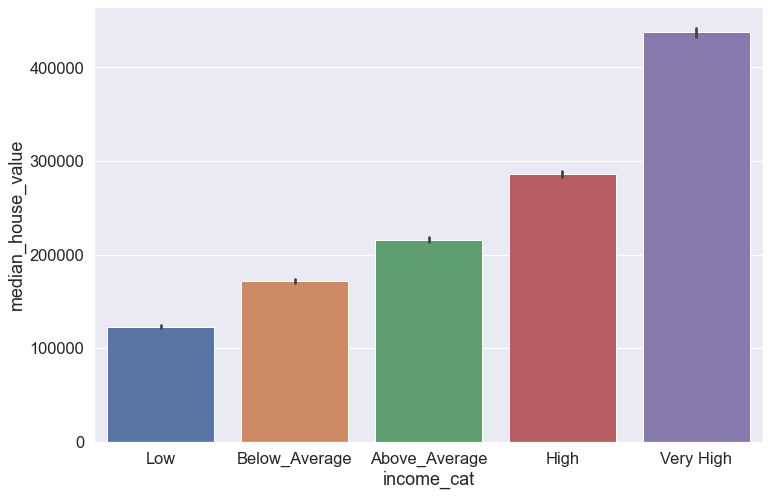

In [30]:
# income_cat column to median house value in a district plot with .barplot
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

In [31]:
# obviously, the higher income is, the higher medium house values in a district are.

 __Plotting a heatmap with mean house values for all combinations of income_cat & ocean_proximity__

In [32]:
# when basic exploring the ds, noted that 
# the ocean_proximity column has a value with not many counts
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [33]:
# creating the matrix for heatmap plotting excluding "ISLAND" value
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


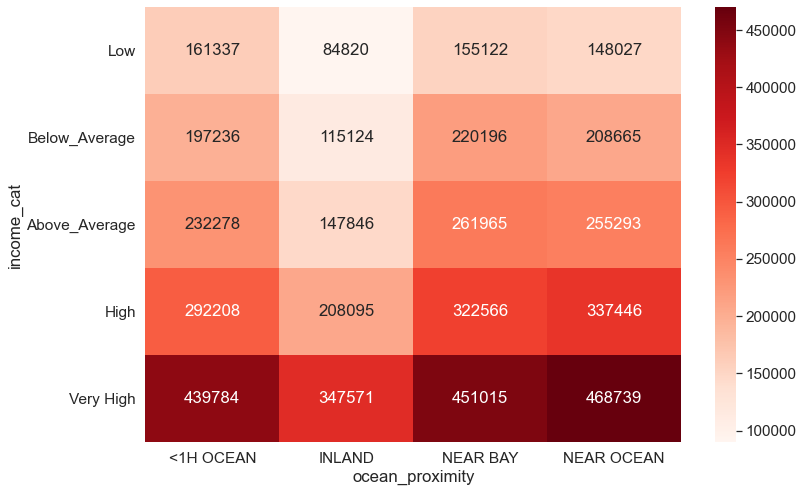

In [34]:
# heatmap plotting
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

In [35]:
# the most expensive houses usually are not far from the seaside

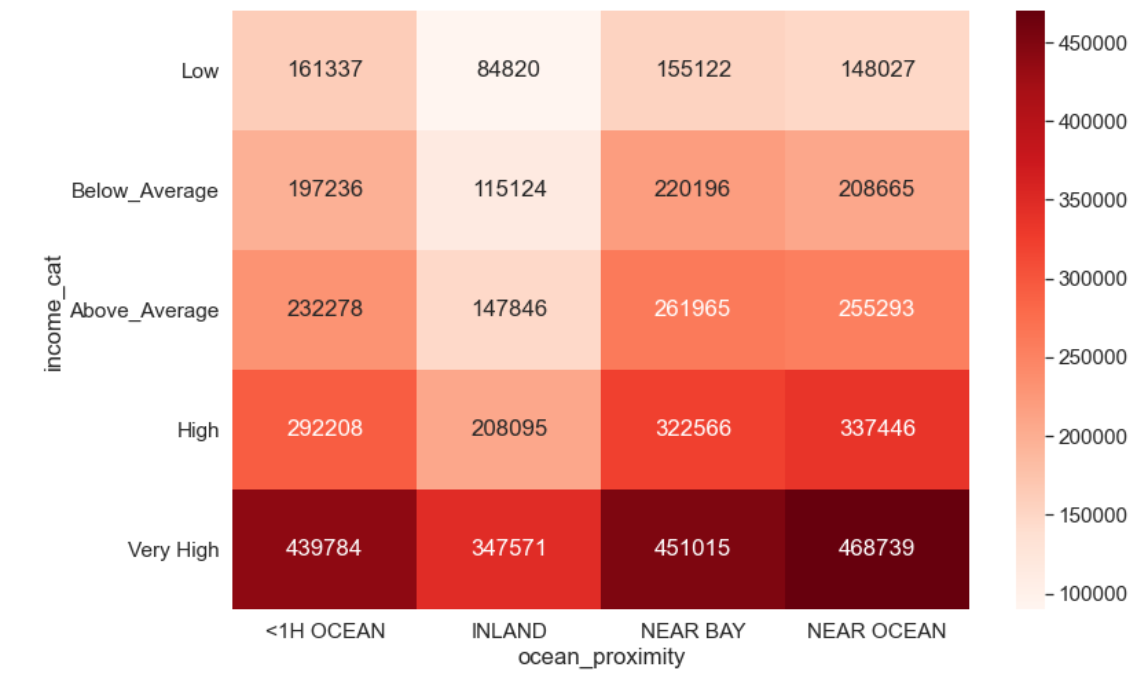

## 5. Feature Engineering

Objective:
- feature scaling

In [36]:
# as we remember, at list 1 feature is scaled. so let's scaled all the features

In [37]:
# setting the option displaying and importing a needed library for scaling
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format

In [38]:
# we are going to scale features but first, 
# we need to separate the column for prediction from features for scaling 

In [39]:
# the column for prediction
label = df.median_house_value.copy()
label

0       452600.00
1       358500.00
2       352100.00
3       341300.00
4       342200.00
           ...   
20635    78100.00
20636    77100.00
20637    92300.00
20638    84700.00
20639    89400.00
Name: median_house_value, Length: 20433, dtype: float64

In [40]:
# features for scaling
features = df.drop(columns = ["median_house_value"])
features.select_dtypes("float")
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room,income_cat
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,NEAR BAY,6.98,2.56,0.15,Very High
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,NEAR BAY,6.24,2.11,0.16,Very High
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,NEAR BAY,8.29,2.80,0.13,High
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,NEAR BAY,5.82,2.55,0.18,High
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,NEAR BAY,6.28,2.18,0.17,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,INLAND,5.05,2.56,0.22,Low
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,INLAND,6.11,3.12,0.22,Low
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,INLAND,5.21,2.33,0.22,Low
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,INLAND,5.33,2.12,0.22,Low


In [41]:
# scaling itself (z-score scaling)
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12


In [42]:
# expected mean = 0
# expected std = 1
feat1.agg(["mean", "std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


__One hot encoding for columns with the object dtype__

In [43]:
# checking if there are columns with the object dtype
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_room         20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

In [44]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [45]:
# getting dummies for ocean_proximity
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [46]:
# when doing linear modeling, there might be some issues with such dummies. 
# it breaks one of the main assumptions for such modeling: no perfect multicollinearity.
# that means there should be NO perfect linear relationship between two or more of the predictors.
# how these dummies break the no perfect multicollinearity assumption?
# well, let's look at the first row, for instance.
# there is just one "1" there. 
# in other words, if there is "1" for a specific dummies feature, other dummies in the row can be nothing but "0".
# we can either work for making the assumption to become true or choose another math model.
# the second option is more convenient. we are choosing Random Forest Regressor

In [47]:
# putting all together
features = pd.concat([feat1, dummies, df.income_cat], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


## 6. Machine Learning. Predicting House Values

In [48]:
# let's move to machine learning code routine.

Objectives:
- splitting into Train and Test sets
- prepare/engineer Features
- fitting the model (Train set)
- testing the model (Test set)
- calculating the error with mean_squared_error
- calculating absolute difference between the genuine and pred values
- feature importance

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

__Splitting into Train and Test sets__

In [50]:
test_size = 0.2
X_test = features.sample(frac = test_size)

In [51]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [52]:
X_train.drop(columns = ["income_cat"], inplace = True)

In [53]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

In [54]:
X_test.drop(columns = ["income_cat"], inplace = True)

__Fitting the Model (Train set)__

In [55]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                   max_features= "sqrt", max_depth= 75, min_samples_split=2)

In [56]:
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.9757083690985071

In [57]:
# pretty high value, though
# might be overfitted

In [58]:
pred = forest_reg.predict(X_train)
pred

array([443284.73 , 385207.076, 328563.404, ...,  89890.8  ,  89132.6  ,
        92044.8  ])

In [59]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17993.225552383352

In [60]:
# we could conclude that actually our model fits the trading data pretty well 

__Testing the Model (Test set)__

In [61]:
forest_reg.score(X_test, y_test)

0.830409071438705

In [62]:
pred = forest_reg.predict(X_test)
pred

array([110841.2  , 119027.802, 210024.802, ..., 104962.   , 177116.8  ,
       152020.8  ])

In [63]:
# calculating the error
# expected: a larger error than for the training set
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47513.098340363096

__Difference between the genuine and pred values__

In [64]:
# df with the genuine test set and with prediction result
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

,True_V,Pred
12176,118300.00,110841.20
1887,86900.00,119027.80
17695,123500.00,210024.80
17392,117600.00,165429.00
2622,78400.00,77809.60
...,...,...
11627,398800.00,378170.50
14389,169800.00,233865.02
12227,97800.00,104962.00
1702,164700.00,177116.80


In [65]:
# absolute difference between the genuine and pred values
ab_diff = comp.True_V.sub(comp.Pred).abs()
ab_diff

12176    7458.80
1887    32127.80
17695   86524.80
17392   47829.00
2622      590.40
          ...   
11627   20629.50
14389   64065.02
12227    7162.00
1702    12416.80
7442     7679.20
Length: 4087, dtype: float64

In [66]:
# the mean absolute difference between the genuine and pred values
ab_diff_mean = ab_diff.mean()
ab_diff_mean

31568.448324443416

In [67]:
# the model is good but not perfect!

__Feature importance__ <br>
In other words, what features affect the prices the most

In [68]:
forest_reg.feature_importances_

array([8.27210902e-02, 7.71374693e-02, 4.19799476e-02, 2.35712890e-02,
       2.05242263e-02, 2.32106373e-02, 2.03860914e-02, 2.81093774e-01,
       6.71967367e-02, 9.74127909e-02, 9.65431765e-02, 1.93456311e-02,
       1.34408078e-01, 1.93891190e-04, 5.44729620e-03, 8.82787414e-03])

In [69]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)

In [70]:
feature_imp

median_income              0.28
INLAND                     0.13
population_per_household   0.10
bedrooms_per_room          0.10
longitude                  0.08
latitude                   0.08
rooms_per_household        0.07
housing_median_age         0.04
total_rooms                0.02
population                 0.02
total_bedrooms             0.02
households                 0.02
<1H OCEAN                  0.02
NEAR OCEAN                 0.01
NEAR BAY                   0.01
ISLAND                     0.00
dtype: float64

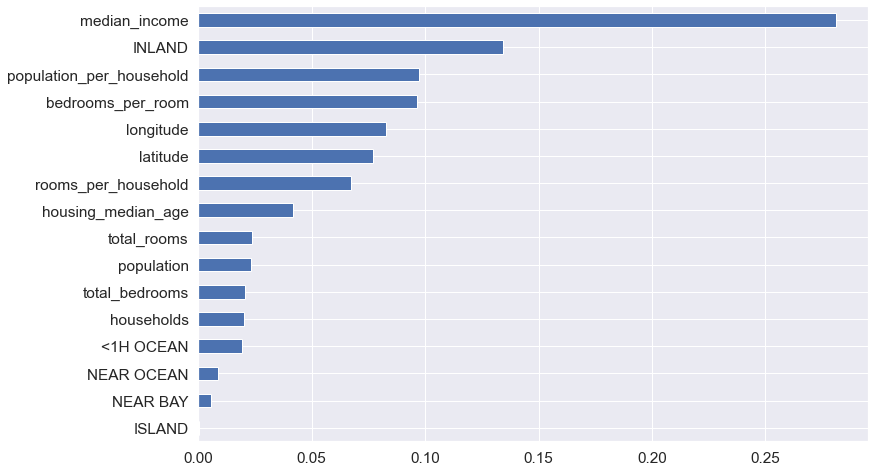

In [71]:
# better if plotted
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()

## 7. Model Enhancing

To enhance the model, we have tried a few different feature combinations. 
The feature combination below returns the best result from those we have tried.

In [72]:
X_train2, X_test2, y_train2, y_test2 = X_train, X_test, y_train, y_test

In [73]:
lst = [X_train2, X_test2, y_train2, y_test2]
for d in lst:
    d.drop(columns=["ISLAND", "NEAR BAY", "NEAR OCEAN", "<1H OCEAN", "households", "total_bedrooms", 
                "total_rooms", "population"], inplace=True)

In [74]:
X_train2

,longitude,latitude,housing_median_age,median_income,rooms_per_household,population_per_household,bedrooms_per_room,INLAND
0,-1.33,1.05,0.98,2.35,0.63,-0.05,-1.15,0
1,-1.32,1.04,-0.61,2.33,0.32,-0.09,-0.99,0
3,-1.34,1.04,1.86,0.93,0.16,-0.05,-0.49,0
4,-1.34,1.04,1.86,-0.01,0.34,-0.09,-0.71,0
5,-1.34,1.04,1.86,0.09,-0.27,-0.09,0.32,0
...,...,...,...,...,...,...,...,...
20634,-0.99,1.70,-0.05,-0.08,0.54,-0.00,-0.75,1
20636,-0.82,1.81,-0.84,-0.69,0.27,0.00,0.04,1
20637,-0.82,1.78,-0.92,-1.14,-0.09,-0.07,0.04,1
20638,-0.87,1.78,-0.84,-1.06,-0.04,-0.09,0.12,1


In [75]:
forest_reg.fit(X_train2, y_train2)
forest_reg.score(X_train2, y_train2)

0.976840644772755

Compare to the first model: 0.9757777447301413

In [76]:
pred2 = forest_reg.predict(X_train2)
pred2

array([443631.928, 380898.522, 346318.628, ...,  91260.2  ,  87898.6  ,
        93661.4  ])

In [77]:
forest_mse2 = mean_squared_error(y_train2, pred2)
forest_rmse2 = np.sqrt(forest_mse)
forest_rmse2

47513.098340363096

Compare to the first model: 17911.017573581863

In [78]:
forest_reg.score(X_test2, y_test2)

0.8384760780164574

Compare to the first model: 0.8213131871494266

In [79]:
forest_mse2 = mean_squared_error(y_test2, forest_reg.predict(X_test2))
forest_rmse2 = np.sqrt(forest_mse)
forest_rmse2

47513.098340363096

Compare to the first model: 49378.714102886945

In [80]:
feature_imp2 = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train2.columns).sort_values(ascending = False)

In [81]:
feature_imp2

median_income              0.29
INLAND                     0.14
population_per_household   0.12
bedrooms_per_room          0.11
latitude                   0.10
longitude                  0.10
rooms_per_household        0.09
housing_median_age         0.05
dtype: float64

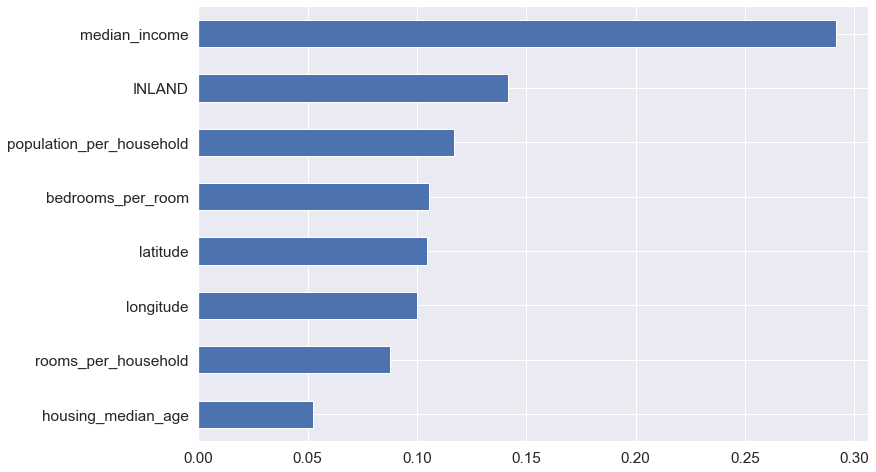

In [82]:
feature_imp2.sort_values().plot.barh(figsize = (12, 8))
plt.show()